In [8]:
import numpy as np
from matplotlib import pyplot as plt

# DATA 607 - Machine Learning

## Class 1: Introduction

### 2025.02.24


#### Machine learning

- _Learn_, from data $(x_i, y_i)$, relationship between _variables_ $x$ and $y$.

- Relationship is _stochastic_:

  $$
  y\sim p(y\mid x)
  $$

- $p$ is _unknown_ and _unknowable_.

- Learn an approximation to $p$ itself or to its **regression function**,

  $$
  f(x) =\mathbb{E}[y\mid x].
  $$


#### Example: Predicting sales from ad spend

> "Suppose that we are statistical consultants hired by a client to
> investigate the association between advertising and sales of a particular
> product."

- We're given sales numbers and ad spend on TV, radio, and newspaper for 200 markets.

- We don't know $p$, the true distribution of sales given ad spend, but we might approximate it by the **linear model**:

  $$
  p \approx \operatorname{Normal}(\texttt{sales}\mid a + b\,\texttt{TV} + c\,\texttt{radio} + d\,\texttt{newspaper},\,\sigma^2)
  $$

- If we don't care about $\sigma^2$, we might just estimate the regression function, $f$:
  $$
  \begin{aligned}
  f(\texttt{TV},\,\texttt{radio},\,\texttt{newspaper}) &= \mathbb{E}[\texttt{sales}\mid \texttt{TV},\,\texttt{radio},\,\texttt{newspaper}]\\
  &\approx a + b\,\texttt{TV} + c\,\texttt{radio} + d\,\texttt{newspaper}
  \end{aligned}
  $$


#### Example: Credit card default prediction

- We want to predict whether a customers will default on their credit card debt based on income, monthly balance, and studentness.

- We model a customer defaulting using the **logistic regression model**:
  $$
  y\sim \operatorname{Bernoulli}\big(\texttt{default}\mid p\big),
  $$
  where
  $$
  \log\left(\frac p{1-p}\right) = a + b\,\texttt{income}+c\,\texttt{balance} + d\,\texttt{student}
  $$


#### Predictive models can inform decisions

- How can we adjust our advertising stragety to increase sales?

- Should we approve an applicants credit card application?

##### ⚠ Models don't know the big picture. ⚠

- Our advertising model doesn't know about Youtube, Facebook, TikTok, etc. It gives a single predictive model for all 200 markets, so it has no "local knowledge".

- Decision on a credit card application depends on our risk tolerance in addition to the applicant's risk. Also, we need to decide on an interest rate.


#### Inference from models

- Sometimes we are content to use a model as a _black box_ for generating predictions.

- Other times, we want more refined, granular understanding of the association between the target/output variable $y$ and the input/feature/predictor variables $x$.

  - Statistical hypothesis tests about model parameters.

  - Model **_interpretation_** and **_insights_**.


#### Interpreting the coefficient of a binary feature in a logistic regression model

- Odds of defaulting:&nbsp;
  $\displaystyle{{o} = \frac{p}{1-p}}$
- From the logistic regression model:

  $$
  \begin{aligned}
  \log\frac{o_{\text{student}}}
  {o_{\text{nonstudent}}} &=
  \log\left(\frac{p_{\text{student}}}{1-p_{\text{student}}}\right) - \log\left(\frac{p_{\text{nonstudent}}}{1-p_{\text{nonstudent}}}\right)\\
  &= \phantom{-}(a + b\,\texttt{income}+c\,\texttt{balance} + d\,(1))\\&\phantom{=}-(a + b\,\texttt{income}+c\,\texttt{balance} + d\,(0))\\
  &= d\\
  \frac{o_{\text{student}}}{o_{\text{nonstudent}}} &= e^{d}\approx 0.54
  \end{aligned}
  $$

- **_The odds of a student defaulting are roughly half those of a nonstudent with comparable income and balance._**


#### Exercise

- For each of the following target variables $y$, what feature variables $x$ might be associated with $y$? Would a model predicting $y$ from these $x$ be useful as _black box_ for generating predictions? Could useful inferences be drawn from such a model?

  - $y$ = weight of newborn baby

  - $y$ = demand for avocados

  - $y$ = standardized test score

  - $y$ = Customer purchased upgrade?

  - $y$ = Cancer returned within 10 years?

  - $y$ = next token


#### Fitting a `scikit-learn` model to data

```python
import pandas as pd
from sklearn.linear_model import LogisticRegression

data = pd.read_csv("data/Default.csv")
X = data[["income", "balance", "student"]]
y = data["default"]

model = LogisticRegression()
model.fit(X, y)
print(model.intercept_, model.coef_)
```

`[-10.9018116] [[ 3.96189932e-06  5.73060606e-03 -6.12564504e-01]]`


#### Using a `scikit-learn` model to predict class labels

- Will a student (resp., nonstudent) with an income of $10,000 and a balance of $1950 default?

  ```python
  x = pd.DataFrame({
      "income": [10000, 10000],
      "balance": [1950, 1950],
      "student": [1, 0]
  })
  model.predict(x)
  ```

  `array([0, 1])`

- The model perdicts that the student won't default (prediction `0`) but the nonstudent will (prediction `1`).


#### Using a `scikit-learn` model to predict probabilities

- What is the probability that a student (resp., nonstudent) with an income of $10,000 and a balance of $1950 default?

  ```python
  model.predict_proba(x)
  ```

  ```
  array([[0.57446092, 0.42553908],
       [0.42250727, 0.57749273]])
  ```

- The first column of the output is probability of class label `0` (no default); the second column is the probability of class label `1` (default).

- The predicted class label is the one with the larger probability:

  ```python
  assert np.all(model.predict_proba(x).argmax(axis=1) == model.predict(x))
  ```


#### Exercises

- **(1)** Use the probabilities from `model.predict_proba(x)` to confirm that

  $$
  \frac{o_{\text{student}}}{o_{\text{nonstudent}}} = 0.54.
  $$

- **(2)** The file `data/enrollment.csv` contains (fake) historical data on SAT scores and GPAs of university applicants, together with the scholarship they were offered and whether they ended up enrolling.

  - **(a)** Fit a logistic regression model to predict whether a student will enroll given their SAT score, GPA, and scholarship offer.

  - **(b)** Plot predicted enrollment probability versus scholarshop offer for a student with an SAT score of 1300 and a GPA of 3.3. What scholarship offer will result in an 80% chance of such a student enrolling?


#### Nonparametric models

- Sometimes (often), linear models just don't fit a dataset.

- By contrast, nonparametric models make are extremely flexible and can be fit to datasets displaying nonlinear patterns.

- There are tradeoffs! More on those later.


#### Example: Curve fitting


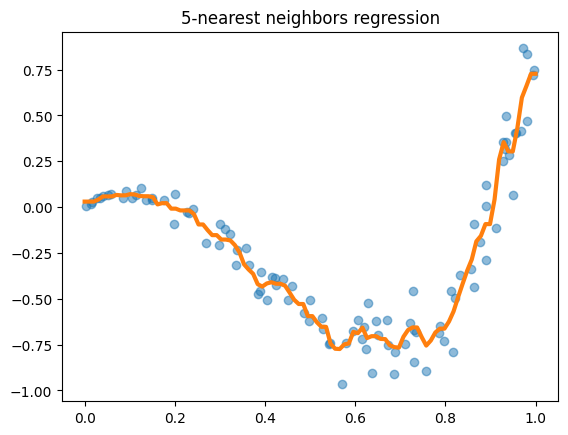

In [6]:
from sklearn.neighbors import KNeighborsRegressor


def make_data(n=100, random_state=None):
    rng = np.random.default_rng(random_state)
    x = rng.uniform(size=n)
    y = 10 * x * (x - 0.2) * (x - 0.9) + 10 * x * 0.02 * rng.normal(size=n)
    return x, y


x, y = make_data(random_state=0)
X = x.reshape(-1, 1)
plt.scatter(x, y, alpha=0.5)

model = KNeighborsRegressor()
model.fit(X, y)

u = np.linspace(0, 1, 100)
v = model.predict(u.reshape(-1, 1))
plt.title("5-nearest neighbors regression")
plt.plot(u, v, lw=3, color="C1")
plt.show()

#### Tradeoff: Choices!


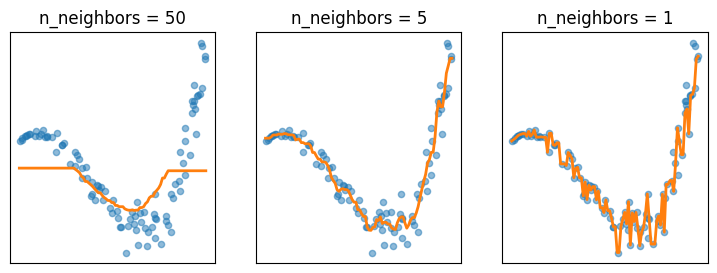

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 3), sharex=True, sharey=True)

for ax, n_neighbors in zip(axes, [50, 5, 1]):
    ax.scatter(x, y, alpha=0.5, s=20)
    ax.set_xticks([])
    ax.set_yticks([])
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X, y)
    v = model.predict(u.reshape(-1, 1))
    ax.plot(u, v, lw=2, color="C1")

axes[0].set_title("n_neighbors = 50")
axes[1].set_title("n_neighbors = 5")
axes[2].set_title("n_neighbors = 1")
plt.show()

#### Quality of fit

- For regression models, the most commonly used measure of fit quality is **mean-squared error (MSE)**.

  $$
  \operatorname{MSE} = \frac1n\sum_{i<n}(y_i - \hat{f}(x_i))^2
  $$

- For the nearest neighbors fits computed above:
  <center>

  | `n_neighbors` | MSE  |
  | ------------: | ---- |
  |            50 | 0.13 |
  |             5 | 0.01 |
  |             1 | 0.00 |

  </center>

- Is the 1-nearest neighbors fit better than the 5-nearest neighbors fit?


#### Predictive error

- A model's utility is typically measured by its predictive performance on **_new data_**, not on the **_training data_** on which the model was fit (trained).

- Let's compute MSE for new data &mdash; a **_testing set_** &mdash; drawn from the same distribution as the training data.

- For the nearest neighbors fits computed above:
  <center>

  | `n_neighbors` | train MSE | test MSE |
  | ------------: | --------: | -------: |
  |            50 |      0.13 |     0.06 |
  |             5 |      0.01 |     0.02 |
  |             1 |      0.00 |     0.03 |

  </center>


In [ ]:
from sklearn.metrics import mean_squared_error

x_test, y_test = make_data(random_state=42)
X_test = x_test.reshape(-1, 1)

for n_neighbors in [50, 5, 1]:
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X, y)
    print(f"n_neighbors = {n_neighbors}")
    print(
        f"mean_squared_error(y_test, model.predict(X_test)) = {mean_squared_error(y_test, model.predict(X_test)):.4f}"
    )

n_neighbors = 50
mean_squared_error(y_test, model.predict(X_test)) = 0.0618
n_neighbors = 5
mean_squared_error(y_test, model.predict(X_test)) = 0.0211
n_neighbors = 1
mean_squared_error(y_test, model.predict(X_test)) = 0.0303
